In [1]:
# import regular expressins packge
# import numbers package
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import re
_pdbcmd_print_frame_status = "OK"

In [2]:
def readFile(fileName):
    file = open(fileName,'r',encoding="cp437")
    fileText = ""
    for line in file:
        fileText += line
    return fileText

In [3]:
# preprocess text
def preProcess(text):
# Remove non-letter chars
    text = re.sub("[^a-zA-Z ]"," ", text)
# Remove extra spaces
    text = re.sub(" +"," ", text)
# Change characters to lower
    text = text.lower()
    return text

In [4]:
# generate a word set of a given text
def genDictionary(texts,stopWords):
# concatenate the texts
    allText = ""
    for line in texts:
        allText += line

    # Generate a word list
    wordsList =  allText.split()
    # Generate a word set
    wordsSet =  set(wordsList)

# Remove the stop words from the word list
    stopWordsList = stopWords.split()
    stopWordsSet = set(stopWordsList)
    dictSet = wordsSet.difference(stopWordsSet)
    return list(dictSet)

In [5]:
# find the distance between arrays
def arrayDist(freqArray1,freqArray2):
    diffArray = freqArray1-freqArray2
#        copute the distance ("pitagoras")
    sqrArray =  np.square(diffArray)
    sumArray =  np.sum(sqrArray)
    return np.sqrt(sumArray)

In [6]:
def getWordFrequency(texts,dictList):
    dictSize = len(dictList)
    nTexts = len(texts)
    wordFreq = np.empty((nTexts,dictSize),dtype=np.int64)
    for i in range(nTexts):
        print("text" + str(i))
        for j in range(dictSize):
            wordFreq[i,j] = len(re.findall(dictList[j],texts[i]))
    return wordFreq

In [7]:
# Remove extreme word frequencies
def reduceMatrix(wordFreq,dictList,minFreq=20,maxFreq=400):
    rows,colomns = wordFreq.shape
    reducedFreq = np.empty((rows,0),dtype=np.int64)
    removedMaxWords = []
    removedMinWords = []
    for i in range(colomns):
        # Find the sum of ever colomn
        sumArrI = wordFreq[:,i].sum()
        # list the words that apear too many times
        if(sumArrI > maxFreq):
            removedMaxWords +=  [dictList[i]]
        # list the words that apear too few times
        elif(sumArrI < minFreq):
            removedMinWords +=  [dictList[i]]
        else:
            # Concatenate colomn I to the matrix
            wordFreqI = wordFreq[:,i].reshape(rows,1)
            reducedFreq = np.concatenate((reducedFreq,wordFreqI),axis=1)
    return reducedFreq,removedMaxWords,removedMinWords

In [8]:
#Partition the text into a list of chunks of size windSize
def partitionText(text, windSize,labels,label):
    numParts = len(text)//windSize
    chunks=[]
    for i in range(numParts):
        nextWind = i*windSize
        nextChunk = text[nextWind:nextWind+windSize]
        chunks += [nextChunk]
        labels += [label]
    return chunks;

In [9]:
def plotLabels(labels,labelsType):
    plt.title("The " +  labelsType + " labels")
    plt.xlabel("partition#")
    plt.ylabel("label")
    plt.bar(range(len(labels)),labels)
    plt.show()

## Section 2

In [10]:
bookTexts = []

#read  and preprocess files
bookTexts += [readFile('DB.txt')]
bookTexts += [readFile('HP_Small.txt')]

texts = []
for text in bookTexts:
    texts += [preProcess(text)]

## Section 3

In [11]:
#wind - chunks size
wind = 50000
#partition the each file into chunks of the size wind
chunks = []
trueLabels = []
for i, text in enumerate(texts):
    chunks+= partitionText(text , wind,trueLabels,i+1)

## Section 4

In [12]:
# Read stop words file - words that can be removed
stopWords = readFile('stopwords_en.txt')
# Generate dictionary
dictList = genDictionary(texts,stopWords)

## Section 5

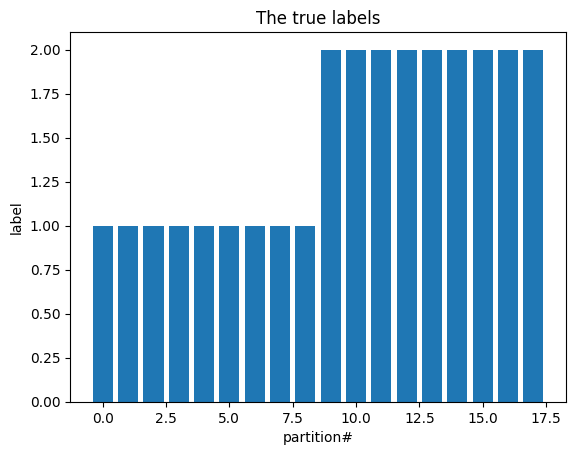

In [13]:
plotLabels(trueLabels,"true")

In [14]:
wordFreq = getWordFrequency(chunks,dictList)

text0
text1
text2
text3
text4
text5
text6
text7
text8
text9
text10
text11
text12
text13
text14
text15
text16
text17


## Section 6

In [15]:
# find the sum of the frequency colomns and
# select colomns having sum > minSum and sum < maxSum
minFreq = 10
maxFreq = 400

# select colomns with frequencies between minFreq and  maxFreq
reducedMat,removedMaxWords,removedMinWords = reduceMatrix(wordFreq,dictList,minFreq,maxFreq)

## Section 7

In [16]:
k = len(bookTexts)

# define the k-means object
kmeans = KMeans(n_clusters = k)
# compute the k-means model of the chunks
kmeans.fit(reducedMat)
# predict the labels of the chunks
predictedLabels = kmeans.predict(reducedMat)
predictedLabels +=1

## Section 8

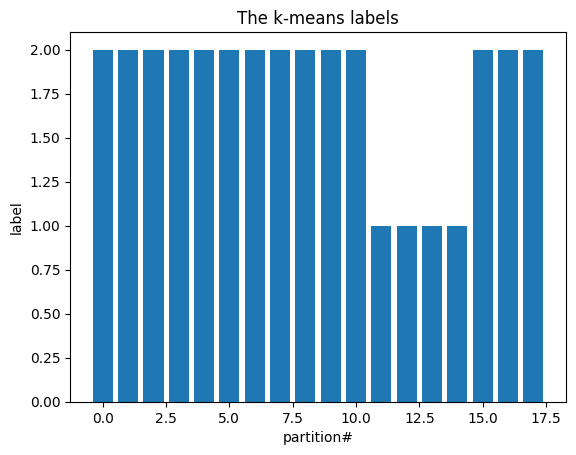

In [17]:
# plot the k-means prediction
plotLabels(predictedLabels,"k-means")